# Данные 
В некотором *городе N* на каждом автобусе/троллейбусе/трамвае установлены GPS трекеры, которые с некоторым промежутком времени передают информацию о своем местоположении на специальный сервер. 

Данные для всех транспортных средства одного маршрута непрерывно записывались на протяжении недели, потом GPS координаты (широта и долгота) были спроецированы на плоскость с использованием [проекции Меркатора](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_%D0%9C%D0%B5%D1%80%D0%BA%D0%B0%D1%82%D0%BE%D1%80%D0%B0) и некоторого линейного преобразования. Эти данные записаны в файле **../data/transport_log.zip** в виде:

>    **1447037729**&nbsp;&nbsp;&lt;tab&gt;&nbsp;&nbsp;**3054.619968**&nbsp;&nbsp;&lt;tab&gt;&nbsp;&nbsp;**2409.828279**&nbsp;&nbsp;&lt;tab&gt;&nbsp;&nbsp;**570d8**

поля разделены табуляцией. Здесь:
- **1447037729** - [UNIX-время](https://ru.wikipedia.org/wiki/UNIX-%D0%B2%D1%80%D0%B5%D0%BC%D1%8F), которое без труда можно преобразовать во что-то разумное с помощью стандартной библиотеки [Python](https://docs.python.org/2/library/datetime.html#datetime.date.fromtimestamp).
- **3054.619968** - координата "x"
- **2409.828279** - координата "y"
- **570d8** - уникальный идентификатор транспортного средства, от которого получен сигнал. 

Маршрут автобосов "туда" не совпадает с маршрутом "обратно". Известно, что в направлении, которое мы назовем "туда"  первая остановка имеет координаты:

>   **(11038.08464497, 8253.17542416)**

последняя:

>   **(283.08479678,  163.45489494)**


# Задачи

- Отобразить все точки на плоскости

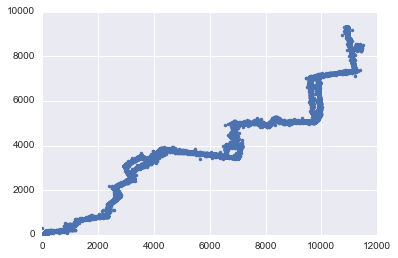

In [2]:
import numpy as np
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

with zipfile.ZipFile('../data/transport_log.zip', 'r') as zf:
    with zf.open('transport_log.txt', 'r') as f:
        fu = io.TextIOWrapper(f, 'utf-8')
        x = []
        y = []
        for line in fu:
            x.append(float(line.split()[1]))
            y.append(float(line.split()[2]))

plt.plot(x, y, '.')
plt.show()
            
        
       
        
        
        

- Отобразить в bar plot зависимость числа точек от часа (0-23). По оси "X" столбцы с метками 0-23, по оси "Y" - число соответствующих точек в логе.

<Container object of 24 artists>

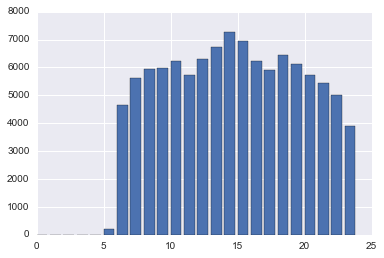

In [7]:
import numpy as np
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

with zipfile.ZipFile('../data/transport_log.zip', 'r') as zf:
    with zf.open('transport_log.txt', 'r') as f:
        fu = io.TextIOWrapper(f, 'utf-8')
        hours = []
        for line in fu:
            hours.append((datetime.datetime.fromtimestamp(int(line.split()[0]))).hour)
            
hrs = np.arange(0, 24)
hrs.resize(2, 24)
hrs1=hrs[0]
for i in range (0, len(hrs[1])):
    for j in range (0, len(hours)):
        if hours[j]==hrs1[i]:
            hrs[1][i]=hrs[1][i]+1
            

plt.bar(hrs[0], hrs[1])


- Выделить из лога подпоследовательности, соответствующие гарантировано полным маршрутам в направлении "туда". То есть автобус должен пройти первую остановку с обозначенными выше координатами, затем последнюю.

Route f9cf0


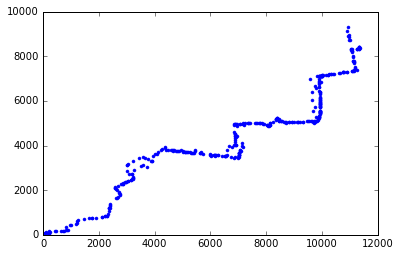

In [83]:
import zipfile
import io
import matplotlib.pyplot as plt
import datetime
import ipywidgets

%matplotlib inline

start = [11038.08464497, 8253.17542416]
finish = [283.08479678, 163.45489494]

with zipfile.ZipFile('../data/transport_log.zip', 'r') as zf:
    with zf.open('transport_log.txt', 'r') as f:
        fu = io.TextIOWrapper(f, 'utf-8')        
        time = []
        x = []
        y = []
        buses = []
        for line in fu:
            time.append((datetime.datetime.fromtimestamp(float(line.split()[0]))))
            x.append(float(line.split()[1]))
            y.append(float(line.split()[2]))
            buses.append(str(line.split()[3]))

delta = 50  #с каким отклонением ищем начальные и конечные точки
has_start = []
has_finish = []

for i in range(len(buses)):    
    if (abs(x[i]-start[0])<delta) and (abs(y[i]-start[1])<delta):
        has_start.append(buses[i])
    if (abs(x[i]-finish[0])<delta) and (abs(y[i]-finish[1])<delta):
        has_finish.append(buses[i])

        
set_start = set(has_start)
set_finish = set(has_finish)

has_all = set_start.intersection(has_finish)
has_all = list(has_all) #маршруты, у которых имеются точки старта и финиша


routes = []
            
for a in range(len(has_all)):
    check_start = False
    check_finish = False
    xs = []
    ys = []
    times = []
    for i in range(len(buses)):
        if has_all[a]==buses[i]:
            if check_start==True and check_finish==True:
                routes.append([has_all[a], xs, ys, times])
                break
            if check_start==False:
                if (abs(x[i]-start[0])<delta) and (abs(y[i]-start[1])<delta):
                    check_start = True
            if check_start==True and check_finish==False:
                xs.append(x[i])
                ys.append(y[i])
                times.append(time[i])
                if (abs(x[i]-finish[0])<delta) and (abs(y[i]-finish[1])<delta):
                    check_finish = True

#нашли пути "туда", которые сначала проходят точку начала, затем точку финиша.
            
def foo(a):
    plt.plot(routes[a][1], routes[a][2], '.')
    print('Route', routes[a][0])


ipywidgets.interact(foo, a=ipywidgets.IntSlider(min=0,max=len(routes)-1,step=1))
plt.show()

- По данным из предыдущего пункта построить приближенный маршрут в виде кусочно-линейно функции, причем линейные компоненты должны иметь одинаковую длину. Отобразить таким образом, чтобы каждый участок имел цвет в зависимости от средней скорости прохождения участка. 

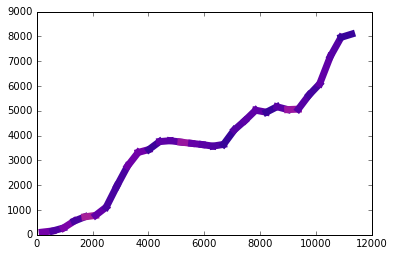

In [87]:
import numpy as np
import matplotlib
import itertools

xmaxs = []
xmins = []
ymaxs = []
ymins = []

for a in range(len(routes)):
    xmaxs.append(max(routes[a][1]))
    xmins.append(min(routes[a][1]))
    ymaxs.append(max(routes[a][2]))
    ymins.append(min(routes[a][2]))
    
xmax = sum(xmaxs)/len(xmaxs)
xmin = sum(xmins)/len(xmins)
ymax = sum(ymaxs)/len(ymaxs)
ymin = sum(ymins)/len(ymins)

n = 30
x = np.linspace(xmin, xmax, n)
y = []

avspds = []
avys = []

avys.append(ymin)

for i in range(len(x)-1):
    xi0 = x[i]
    xi1 = x[i+1]
    speeds = []
    for route in routes:
        routepiece = []
        routex = route[1]
        routey = route[2]
        routetime = route[3]
        for i in range(len(routex)):
            if routex[i]>xi0 and routex[i]<xi1:
                routepiece.append([routex[i], routey[i], routetime[i]])
        if len(routepiece)<2:
            continue
        troute = np.array(routepiece).transpose()
        amin = np.argmin(troute[0])
        amax = np.argmax(troute[0])
        mintime = min(troute[2])
        maxtime = max(troute[2])
        reqtime = (abs(mintime-maxtime)).total_seconds()
        dist = ((troute[0][amin]-troute[0][amax])**2 + (troute[1][amin]-troute[1][amax])**2)**0.5
        speed = dist/reqtime
        speeds.append(speed)
        if i!=len(x)-2:
            y.append(troute[1].tolist())
    avspd = sum(speeds)/len(speeds)
    avspds.append(avspd)
    y = list(itertools.chain.from_iterable(y))
    if i!=len(x)-2:
        avy = sum(y)/len(y)
        avys.append(avy)
        y = []
avys.append(ymax)


spd_norm = avspds / np.linalg.norm(avspds)
for i in range(len(x)-1):
    scheme = matplotlib.cm.plasma(spd_norm[i])    
    plt.plot([x[i], x[i+1]], [avys[i], avys[i+1]], color=scheme, linewidth=7)
plt.show()